In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Feature Extraction

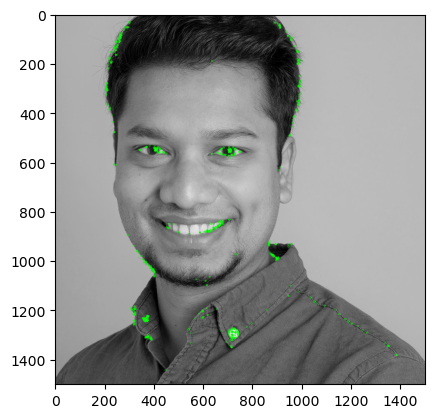

In [3]:
# Initialize the ORB detector
orb = cv2.ORB_create(nfeatures=1000)

image1 = cv2.imread('RamanGoyal.jpg', cv2.IMREAD_GRAYSCALE)

# Detect keypoints and compute descriptors for the first image
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
 
# Detect keypoints and compute descriptors for the second image
keypoints2, descriptors2 = orb.detectAndCompute(image1, None)

# Draw keypoints on the image for visualization
image_with_keypoints = cv2.drawKeypoints(image1, keypoints1, None, color=(0, 255, 0), flags=0)

plt.imshow(image_with_keypoints)



Feature Matching    

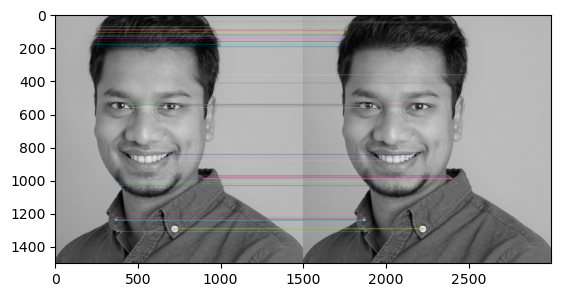

In [6]:
# Initialize the BFMatcher with default params
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

match = bf.match(descriptors1, descriptors2)

match = sorted(match, key=lambda x: x.distance)

top_matches = match[:50]
matched_image = cv2.drawMatches(image1, keypoints1, image1, keypoints2, top_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matched_image)



In [27]:
# Optionally, extract the matched points
matched_points1 = np.float32([keypoints1[m.queryIdx].pt for m in match])
matched_points2 = np.float32([keypoints2[m.trainIdx].pt for m in match])

# Print the coordinates of the matched points
print("Matched points in frame I:")
print(matched_points1)
print("Matched points in frame I+1:")
print(matched_points2)

Matched points in frame I:
[[ 266.        94.     ]
 [ 379.      1224.     ]
 [ 886.       983.     ]
 ...
 [ 318.9032  1261.28   ]
 [ 318.9032  1243.3641 ]
 [ 945.96     935.21045]]
Matched points in frame I+1:
[[ 266.        94.     ]
 [ 379.      1224.     ]
 [ 886.       983.     ]
 ...
 [ 318.9032  1261.28   ]
 [ 318.9032  1243.3641 ]
 [ 945.96     935.21045]]


Pose Estimation